In [44]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
file = 'Motor_Vehicle_Crashes_modified.csv'

In [46]:
motor_vehicle_df = pd.read_csv(file, encoding="ISO-8859-1")


In [47]:
motor_vehicle_df.head()
#motorvehicle_df.head()

,Year,Vehicle Body Type,Action Prior to Accident,Type / Axles of Truck or Bus,Vehicle Year,State of Registration,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Unnamed: 12
0,2016,SUBURBAN,Changing Lanes,Not Entered,2012.0,NY,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,NaN
1,2016,PICKUP TRUCK,Going Straight Ahead,Not Entered,2014.0,NY,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,NaN
2,2016,4 DOOR SEDAN,Going Straight Ahead,Not Entered,2007.0,NY,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,NaN
3,2016,SUBURBAN,Going Straight Ahead,Not Entered,2011.0,NY,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown,NaN
4,2016,SUBURBAN,Going Straight Ahead,Not Entered,2004.0,NY,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object",NaN


In [48]:
del motor_vehicle_df['Unnamed: 12']
motor_vehicle_df.head()

,Year,Vehicle Body Type,Action Prior to Accident,Type / Axles of Truck or Bus,Vehicle Year,State of Registration,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type
0,2016,SUBURBAN,Changing Lanes,Not Entered,2012.0,NY,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable
1,2016,PICKUP TRUCK,Going Straight Ahead,Not Entered,2014.0,NY,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable
2,2016,4 DOOR SEDAN,Going Straight Ahead,Not Entered,2007.0,NY,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable
3,2016,SUBURBAN,Going Straight Ahead,Not Entered,2011.0,NY,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown
4,2016,SUBURBAN,Going Straight Ahead,Not Entered,2004.0,NY,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object"


In [49]:
motor_vehicle_df.count()
#motorvehicle_df.count()
#motor_vehicle_df['Vehicle Make'].value_counts()

Year                                 1048575
Vehicle Body Type                    1048575
Action Prior to Accident             1048575
Type / Axles of Truck or Bus         1048575
Vehicle Year                          890678
State of Registration                 965273
Vehicle Make                          891552
Contributing Factor 1                1048552
Contributing Factor 1 Description    1048552
Contributing Factor 2                1048553
Contributing Factor 2 Description    1048553
Event Type                           1028946
dtype: int64

In [50]:
motor_vehicle_df = motor_vehicle_df.dropna(how='any')

In [51]:
motor_vehicle_df.count()

Year                                 870343
Vehicle Body Type                    870343
Action Prior to Accident             870343
Type / Axles of Truck or Bus         870343
Vehicle Year                         870343
State of Registration                870343
Vehicle Make                         870343
Contributing Factor 1                870343
Contributing Factor 1 Description    870343
Contributing Factor 2                870343
Contributing Factor 2 Description    870343
Event Type                           870343
dtype: int64

In [52]:
#motor_vehicle_df['Vehicle Make'].replace('TYOYTA', 'TOYOTA', inplace = True)
motor_vehicle_df['Vehicle Make'] = motor_vehicle_df['Vehicle Make'].replace({'FRD':'FORD','NISSA': 'NISSAN','HYUND' :'HYUNDAI','SUBAR':'SUBARU'})



In [53]:
motor_vehicle_df['Vehicle Make'].value_counts()

TOYOT      101443
FORD        96623
HONDA       89126
CHEVR       86578
NISSAN      65892
DODGE       37912
HYUNDAI     35850
JEEP        34433
SUBARU      21591
CHRYS       17852
VOLKS       16665
KIA         16602
BMW         16503
GMC         16192
ME/BE       14619
LEXUS       12129
ACURA       11831
MAZDA       11322
BUICK       11166
PONTI       10721
LINCO        8541
MITSU        7758
AUDI         7533
INFIN        7510
CADIL        7230
SATUR        7083
MERCU        7044
VOLVO        5608
CHEV         5323
TOYT         5140
            ...  
VURM            1
FONA            1
LARED           1
MEBEN           1
START           1
WANA            1
FR/EX           1
LHJ             1
PIAG            1
STRC            1
WELLS           1
FLAIR           1
BMWV            1
GROVE           1
FORDG           1
BORF            1
KRUZ            1
JAGUR           1
NARV            1
REITI           1
GIL             1
USAC            1
NWFL            1
MMMC            1
CRAF      

In [54]:
priorfactor_year1_df = motor_vehicle_df.loc[:,["Year","Contributing Factor 1 Description","Action Prior to Accident"]]
priorfactor_year_df = priorfactor_year1_df.rename(columns={"Contributing Factor 1 Description":"Factors",
                                                      "Action Prior to Accident":"Prior_Reasons"})
priorfactor_year_df.head()

,Year,Factors,Prior_Reasons
0,2016,Unsafe Lane Changing,Changing Lanes
1,2016,Pavement Slippery,Going Straight Ahead
2,2016,Pavement Slippery,Going Straight Ahead
3,2016,Pavement Slippery,Going Straight Ahead
4,2016,Pavement Slippery,Going Straight Ahead


In [55]:
grouped_factor_df = priorfactor_year_df.groupby(["Prior_Reasons","Year"])
priorfactors_count = grouped_factor_df["Year"].count()

priorfactors_df = pd.DataFrame({"Count of Prior_Reasons" : priorfactors_count})
priorfactors_df


Count of Prior_Reasons
Prior_Reasons              Year                        
Avoiding Object in Roadway 2014                    1603
                           2015                    1546
Backing                    2014                   14012
                           2015                   14717
                           2016                       1
Changing Lanes             2014                    8927
                           2015                   10101
                           2016                       1
Entering Parked Position   2014                    1841
                           2015                    1929
                           2016                       1
Going Straight Ahead       2014                  207239
                           2015                  218018
                           2016                      12
Making Left Turn           2014                   33788
                           2015                   36458
Making Left Turn on Red    2014                     124
                           2015                     103
Making Right Turn          2014                   13754
                           2015                   15087
                           2016                       1
Making Right Turn on Red   2014                     257
                           2015                     243
Making U Turn              2014                    2136
                           2015                    2211
Merging                    2014                    3144
                           2015                    3380
Not Applicable             2014                     169
                           2015                     259
Other                      2014                    2471
                           2015                    2469
Overtaking/Passing         2014                    2869
                           2015                    3109
Parked                     2014                   28916
                           2015                   31469
                           2016                       2
Police Pursuit             2014                     107
                           2015                     121
Slowing or Stopping        2014                   35006
                           2015                   37871
                           2016                       3
Starting from Parking      2014                    2594
                           2015                    2846
Starting in Traffic        2014                    6639
                           2015                    7054
Stopped in Traffic         2014                   37173
                           2015                   40982
                           2016                       1
Unknown                    2014                   17612
                           2015                   19967

In [56]:
priorfactors_df_pivot = priorfactors_df.pivot_table(index = "Prior_Reasons",columns = "Year")["Count of Prior_Reasons"]
priorfactors_df_pivot = priorfactors_df_pivot.reset_index()
priorfactors_df_pivot=priorfactors_df_pivot.fillna(0)

priorfactors_df_pivot

Year,Prior_Reasons,2014,2015,2016
0,Avoiding Object in Roadway,1603.0,1546.0,0.0
1,Backing,14012.0,14717.0,1.0
2,Changing Lanes,8927.0,10101.0,1.0
3,Entering Parked Position,1841.0,1929.0,1.0
4,Going Straight Ahead,207239.0,218018.0,12.0
5,Making Left Turn,33788.0,36458.0,0.0
6,Making Left Turn on Red,124.0,103.0,0.0
7,Making Right Turn,13754.0,15087.0,1.0
8,Making Right Turn on Red,257.0,243.0,0.0
9,Making U Turn,2136.0,2211.0,0.0


In [96]:
factors_plt_df = priorfactors_df_pivot[[2014,2015,"Prior_Reasons"]]
factors_plt_df = factors_plt_df.set_index("Prior_Reasons")

<Figure size 1440x360 with 0 Axes>

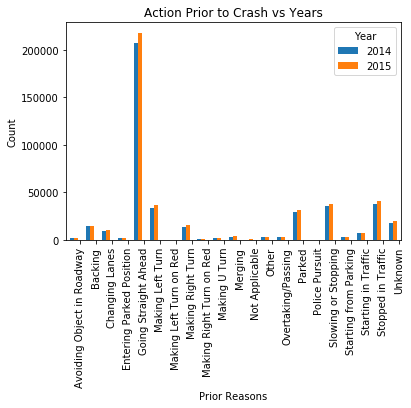

In [106]:
plt.figure(figsize=(20,5))
ax = factors_plt_df.plot.bar()
plt.xticks(tick_locations, priorfactors_df_pivot["Prior_Reasons"].values, rotation="vertical")

plt.title("Action Prior to Crash vs Years")
plt.xlabel("Prior Reasons")
plt.ylabel("Count")
plt.show()

In [107]:
plt.savefig("C:/Users/hello/OneDrive/Desktop/Rutgers-project1/Images/Prior_reasons.png")
plt.show()

<Figure size 432x288 with 0 Axes>